# Topic Modelling

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using matplotlib backend: MacOSX


In [2]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

- Download the newsgroups data from [here](https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json).

In [3]:
df = pd.read_json('./newsgroups.json')
pprint(df.target_names.unique())
df.head()

array(['rec.autos', 'comp.sys.mac.hardware', 'rec.motorcycles',
       'misc.forsale', 'comp.os.ms-windows.misc', 'alt.atheism',
       'comp.graphics', 'rec.sport.baseball', 'rec.sport.hockey',
       'sci.electronics', 'sci.space', 'talk.politics.misc', 'sci.med',
       'talk.politics.mideast', 'soc.religion.christian',
       'comp.windows.x', 'comp.sys.ibm.pc.hardware', 'talk.politics.guns',
       'talk.religion.misc', 'sci.crypt'], dtype=object)


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles
100,From: tchen@magnus.acs.ohio-state.edu (Tsung-K...,6,misc.forsale
1000,From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)\n...,2,comp.os.ms-windows.misc


In [4]:
data = df.content.values.tolist()
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: '
 'rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: '
 '15 I was wondering if anyone out there could enlighten me on this car I saw '
 'the other day. It was a 2-door sports car, looked to be from the late 60s/ '
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition, the front bumper was separate from the rest of the body. This is '
 'all I know. If anyone can tellme a model name, engine specs, years of '
 'production, where this car is made, history, or whatever info you have on '
 'this funky looking car, please e-mail. Thanks, - IL ---- brought to you by '
 'your neighborhood Lerxst ---- ']


In [5]:
def sent_to_words(sentences):
    for sent in sentences:
        yield(simple_preprocess(str(sent), deacc=True))

data_words = list(sent_to_words(data))
pprint(data_words[:1])

[['from',
  'wheres',
  'my',
  'thing',
  'subject',
  'what',
  'car',
  'is',
  'this',
  'nntp',
  'posting',
  'host',
  'rac',
  'wam',
  'umd',
  'edu',
  'organization',
  'university',
  'of',
  'maryland',
  'college',
  'park',
  'lines',
  'was',
  'wondering',
  'if',
  'anyone',
  'out',
  'there',
  'could',
  'enlighten',
  'me',
  'on',
  'this',
  'car',
  'saw',
  'the',
  'other',
  'day',
  'it',
  'was',
  'door',
  'sports',
  'car',
  'looked',
  'to',
  'be',
  'from',
  'the',
  'late',
  'early',
  'it',
  'was',
  'called',
  'bricklin',
  'the',
  'doors',
  'were',
  'really',
  'small',
  'in',
  'addition',
  'the',
  'front',
  'bumper',
  'was',
  'separate',
  'from',
  'the',
  'rest',
  'of',
  'the',
  'body',
  'this',
  'is',
  'all',
  'know',
  'if',
  'anyone',
  'can',
  'tellme',
  'model',
  'name',
  'engine',
  'specs',
  'years',
  'of',
  'production',
  'where',
  'this',
  'car',
  'is',
  'made',
  'history',
  'or',
  'whatever',
  

In [6]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

pprint(trigram_model[bigram_model[data_words[0]]])

/Users/AMANRAJ/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['from',
 'wheres',
 'my',
 'thing',
 'subject',
 'what',
 'car',
 'is',
 'this',
 'nntp_posting_host',
 'rac_wam_umd_edu',
 'organization',
 'university',
 'of',
 'maryland_college_park',
 'lines',
 'was',
 'wondering',
 'if',
 'anyone',
 'out',
 'there',
 'could',
 'enlighten',
 'me',
 'on',
 'this',
 'car',
 'saw',
 'the',
 'other',
 'day',
 'it',
 'was',
 'door',
 'sports',
 'car',
 'looked',
 'to',
 'be',
 'from',
 'the',
 'late',
 'early',
 'it',
 'was',
 'called',
 'bricklin',
 'the',
 'doors',
 'were',
 'really',
 'small',
 'in',
 'addition',
 'the',
 'front_bumper',
 'was',
 'separate',
 'from',
 'the',
 'rest',
 'of',
 'the',
 'body',
 'this',
 'is',
 'all',
 'know',
 'if',
 'anyone',
 'can',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'of',
 'production',
 'where',
 'this',
 'car',
 'is',
 'made',
 'history',
 'or',
 'whatever',
 'info',
 'you',
 'have',
 'on',
 'this',
 'funky',
 'looking',
 'car',
 'please',
 'mail',
 'thanks',
 'il',
 'brought',
 'to',
 

In [7]:
def remove_stopwords(text):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in text]

def make_bigrams(text):
    return [bigram_model[doc] for doc in text]

def make_trigrams(text):
    return [trigram_model[bigram_model[doc]] for doc in text]

def lemmatization(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    text_out = []
    for sent in text:
        doc = nlp(" ".join(sent)) 
        text_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return text_out

In [8]:
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['where', 's', 'thing', 'car', 'nntp_post', 'host', 'rac_wam', 'umd', 'organization', 'university', 'maryland_college', 'park', 'line', 'wonder', 'anyone', 'could', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'front_bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'whatev', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


In [9]:
id2word = corpora.Dictionary(data_lemmatized)
text = data_lemmatized
corpus = [id2word.doc2bow(doc) for doc in text]
pprint(corpus[:1])

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 5),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1)]]


In [10]:
id2word[0]

'addition'

In [11]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('addition', 1),
  ('anyone', 2),
  ('body', 1),
  ('bricklin', 1),
  ('bring', 1),
  ('call', 1),
  ('car', 5),
  ('could', 1),
  ('day', 1),
  ('door', 2),
  ('early', 1),
  ('engine', 1),
  ('enlighten', 1),
  ('front_bumper', 1),
  ('funky', 1),
  ('history', 1),
  ('host', 1),
  ('info', 1),
  ('know', 1),
  ('late', 1),
  ('lerxst', 1),
  ('line', 1),
  ('look', 2),
  ('mail', 1),
  ('make', 1),
  ('maryland_college', 1),
  ('model', 1),
  ('name', 1),
  ('neighborhood', 1),
  ('nntp_post', 1),
  ('organization', 1),
  ('park', 1),
  ('production', 1),
  ('rac_wam', 1),
  ('really', 1),
  ('rest', 1),
  ('s', 1),
  ('see', 1),
  ('separate', 1),
  ('small', 1),
  ('spec', 1),
  ('sport', 1),
  ('tellme', 1),
  ('thank', 1),
  ('thing', 1),
  ('umd', 1),
  ('university', 1),
  ('whatev', 1),
  ('where', 1),
  ('wonder', 1),
  ('year', 1)]]

In [12]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"_" + 0.029*"blue" + 0.021*"tank" + 0.014*"cubs_suck" + 0.012*"eg" + '
  '0.012*"gas" + 0.011*"hi" + 0.007*"henry_spencer" + 0.007*"cigarette" + '
  '0.006*"xlib"'),
 (1,
  '0.020*"value" + 0.020*"bus" + 0.019*"specifically" + 0.015*"function" + '
  '0.015*"associate" + 0.013*"motorcycle" + 0.011*"properly" + 0.010*"code" + '
  '0.008*"confuse" + 0.008*"error"'),
 (2,
  '0.023*"window" + 0.020*"card" + 0.017*"file" + 0.014*"drive" + 0.013*"use" '
  '+ 0.013*"system" + 0.011*"problem" + 0.010*"run" + 0.009*"color" + '
  '0.009*"do"'),
 (3,
  '0.035*"game" + 0.033*"team" + 0.019*"player" + 0.017*"play" + 0.017*"win" + '
  '0.016*"hockey" + 0.013*"season" + 0.011*"contact" + 0.011*"year" + '
  '0.010*"nhl"'),
 (4,
  '0.026*"wire" + 0.017*"circuit" + 0.015*"faq" + 0.015*"connect" + '
  '0.013*"wiring" + 0.013*"voice" + 0.013*"cover" + 0.011*"outlet" + '
  '0.011*"neutral" + 0.010*"conference"'),
 (5,
  '0.030*"government" + 0.024*"gun" + 0.022*"law" + 0.017*"state" + '
  '0.0

In [14]:
print('Perplexity:', lda_model.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Perplexity: -8.754132382638572
Coherence Score: 0.5152202258019667


In [15]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [16]:
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      16.259497        1       1  0.336980 -0.001273
13     15.227178        1       2  0.291082 -0.003094
18     14.570026        1       3  0.328803 -0.128163
2       6.161614        1       4  0.091736  0.226456
15      5.972771        1       5  0.059670  0.222622
10      4.344125        1       6 -0.084990 -0.112894
17      4.177769        1       7  0.060982 -0.182970
12      3.586097        1       8 -0.022511 -0.036445
5       3.366133        1       9 -0.022878 -0.021224
16      3.271516        1      10 -0.029306  0.219710
6       3.227276        1      11 -0.062722 -0.017220
9       2.969341        1      12 -0.062888  0.139466
14      2.741141        1      13 -0.088865 -0.062660
3       2.731783        1      14 -0.047739 -0.117467
8       2.290412        1      15 -0.111480  0.003694
19      2.126724        1      16 -0.113679 -0.023402
11      2.081844        1      17 -0.092169 -0.110806
4       1.693867        1      18 -0.134212  0.001612
0       1.679181        1      19 -0.164197 -0.027987
1       1.521703        1      20 -0.131617  0.032046, topic_info=      Category          Freq          Term         Total  loglift  logprob
term                                                                      
4146   Default  57084.000000            ax  57084.000000  30.0000  30.0000
21     Default  12491.000000          line  12491.000000  29.0000  29.0000
82     Default  16294.000000           not  16294.000000  28.0000  28.0000
30     Default  11142.000000  organization  11142.000000  27.0000  27.0000
3721   Default   3844.000000           max   3844.000000  26.0000  26.0000
65     Default  10454.000000            do  10454.000000  25.0000  25.0000
322    Default   9655.000000         write   9655.000000  24.0000  24.0000
55     Default   7586.000000       article   7586.000000  23.0000  23.0000
244    Default   8048.000000            be   8048.000000  22.0000  22.0000
154    Default  11783.000000         would  11783.000000  21.0000  21.0000
303    Default   6906.000000           say   6906.000000  20.0000  20.0000
226    Default   5804.000000            go   5804.000000  19.0000  19.0000
29     Default   4407.000000     nntp_post   4407.000000  18.0000  18.0000
16     Default   4083.000000          host   4083.000000  17.0000  17.0000
118    Default   6852.000000           get   6852.000000  16.0000  16.0000
46     Default   5027.000000    university   5027.000000  15.0000  15.0000
1911   Default   1863.000000         space   1863.000000  14.0000  14.0000
215    Default   2294.000000        window   2294.000000  13.0000  13.0000
36     Default   3735.000000             s   3735.000000  12.0000  12.0000
18     Default   7292.000000          know   7292.000000  11.0000  11.0000
50     Default   3461.000000          year   3461.000000  10.0000  10.0000
317    Default   4598.000000           use   4598.000000   9.0000   9.0000
2726   Default   1540.000000          game   1540.000000   8.0000   8.0000
23     Default   1948.000000          mail   1948.000000   7.0000   7.0000
681    Default   3006.000000         right   3006.000000   6.0000   6.0000
967    Default   1684.000000     christian   1684.000000   5.0000   5.0000
1362   Default   1746.000000    government   1746.000000   4.0000   4.0000
567    Default   1464.000000          team   1464.000000   3.0000   3.0000
206    Default   3380.000000        system   3380.000000   2.0000   2.0000
60     Default   2012.000000          card   2012.000000   1.0000   1.0000
...        ...           ...           ...           ...      ...      ...
11736  Topic20    119.371948          guru    120.323853   4.1774  -5.3259
3548   Topic20    117.624451  countersteer    118.576355   4.1773  -5.3406
10436  Topic20    113.027069       bradley    113.978973   4.1770  -5.3805
280    Topic20    112.217712          lane    113.169617   4.1769  -5

## Mallet LDA Algorithm

- Download the mallet version of LDA from [here](http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip).

In [17]:
mallet_path = '/Users/AMANRAJ/Desktop/topic_modelling/mallet-2.0.8/bin/mallet'
lda_mallet_model = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, 
                                                    corpus=corpus, 
                                                    num_topics=20, 
                                                    id2word=id2word)

In [18]:
pprint(lda_mallet_model.show_topics(formatted=True))

coherence_model_lda_mallet = CoherenceModel(model=lda_mallet_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_mallet = coherence_model_lda_mallet.get_coherence()
print('Coherence Score:', coherence_lda_mallet)

[(0,
  '0.023*"drive" + 0.018*"card" + 0.017*"problem" + 0.015*"system" + '
  '0.012*"window" + 0.012*"scsi" + 0.012*"driver" + 0.012*"mac" + 0.010*"work" '
  '+ 0.010*"computer"'),
 (16,
  '0.026*"good" + 0.020*"year" + 0.013*"organization" + 0.013*"run" + '
  '0.012*"line" + 0.012*"game" + 0.011*"write" + 0.011*"win" + 0.010*"article" '
  '+ 0.010*"hit"'),
 (7,
  '0.021*"gun" + 0.016*"state" + 0.016*"law" + 0.013*"people" + '
  '0.009*"article" + 0.008*"case" + 0.008*"write" + 0.007*"crime" + '
  '0.007*"weapon" + 0.006*"firearm"'),
 (3,
  '0.025*"space" + 0.008*"system" + 0.007*"launch" + 0.007*"earth" + '
  '0.006*"nasa" + 0.006*"organization" + 0.006*"satellite" + 0.005*"time" + '
  '0.005*"datum" + 0.005*"mission"'),
 (18,
  '0.031*"key" + 0.014*"system" + 0.011*"encryption" + 0.010*"bit" + '
  '0.009*"security" + 0.009*"chip" + 0.008*"technology" + 0.008*"government" + '
  '0.007*"public" + 0.007*"privacy"'),
 (17,
  '0.103*"line" + 0.098*"organization" + 0.079*"write" + 0.078*"

In [19]:
def compute_coherence_values(dictionary, corpus, text, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, 
                                                    corpus=corpus, 
                                                    num_topics=num_topics, 
                                                    id2word=dictionary)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

### Optimal number of topics

In [20]:
model_list, coherence_values = compute_coherence_values(id2word, corpus, data_lemmatized, limit=40, start=2, step=6)

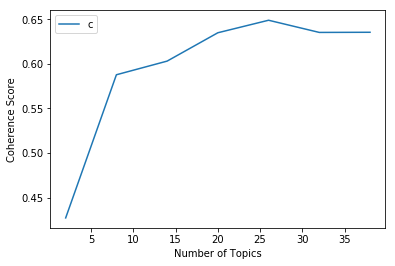

In [21]:
start = 2; limit = 40; step = 6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
for (num_topic, cv) in zip(x, coherence_values):
    print("Number of Topics =", num_topic, " has Coherence Value of", round(cv, 4))

Number of Topics = 2  has Coherence Value of 0.4273
Number of Topics = 8  has Coherence Value of 0.5877
Number of Topics = 14  has Coherence Value of 0.603
Number of Topics = 20  has Coherence Value of 0.6348
Number of Topics = 26  has Coherence Value of 0.6488
Number of Topics = 32  has Coherence Value of 0.6352
Number of Topics = 38  has Coherence Value of 0.6353


In [23]:
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=True)
pprint(optimal_model.print_topics(num_words=10))

[(6,
  '0.028*"time" + 0.024*"number" + 0.020*"bit" + 0.019*"problem" + '
  '0.018*"point" + 0.016*"find" + 0.014*"part" + 0.012*"give" + 0.011*"change" '
  '+ 0.009*"note"'),
 (21,
  '0.021*"send" + 0.020*"information" + 0.020*"post" + 0.019*"mail" + '
  '0.017*"list" + 0.015*"address" + 0.013*"group" + 0.011*"internet" + '
  '0.010*"email" + 0.009*"include"'),
 (25,
  '0.029*"space" + 0.009*"launch" + 0.008*"earth" + 0.007*"nasa" + '
  '0.007*"satellite" + 0.006*"system" + 0.006*"mission" + 0.006*"moon" + '
  '0.006*"project" + 0.006*"research"'),
 (10,
  '0.148*"write" + 0.120*"article" + 0.074*"line" + 0.071*"organization" + '
  '0.022*"reply" + 0.019*"post" + 0.018*"read" + 0.013*"question" + '
  '0.008*"news" + 0.008*"disclaimer"'),
 (23,
  '0.013*"claim" + 0.013*"exist" + 0.012*"question" + 0.011*"argument" + '
  '0.011*"evidence" + 0.010*"true" + 0.010*"reason" + 0.009*"make" + '
  '0.008*"science" + 0.008*"people"'),
 (24,
  '0.039*"key" + 0.016*"system" + 0.014*"encryption" +

### Dominant topic in each sentence

In [24]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, text=data):
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Percentage_Contribution', 'Topic_Keywords']

    contents = pd.Series(text)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [25]:
df_topic_sent_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, text=data)
df_dominant_topic = df_topic_sent_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Percentage_Contribution', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Percentage_Contribution,Keywords,Text
0,0,22.0,0.2156,"car, buy, good, price, organization, sell, lin...",From: (wheres my thing) Subject: WHAT car is t...
1,1,15.0,0.1622,"drive, card, problem, system, scsi, driver, ma...",From: (Guy Kuo) Subject: SI Clock Poll - Final...
2,2,9.0,0.2026,"bike, road, drive, dod, front, car, speed, lea...",From: (Irwin Arnstein) Subject: Re: Recommenda...
3,3,8.0,0.4094,"file, image, software, window, program, versio...",From: (Tsung-Kun Chen) Subject: ** Software fo...
4,4,15.0,0.2212,"drive, card, problem, system, scsi, driver, ma...",From: (Don A.B. Lindbergh) Subject: Diamond SS...
5,5,22.0,0.3968,"car, buy, good, price, organization, sell, lin...",From: (Robert Loper) Subject: Re: SHO and SC N...
6,6,10.0,0.0953,"write, article, line, organization, reply, pos...",From: (Kim Richard Man) Subject: SyQuest 44M c...
7,7,8.0,0.1361,"file, image, software, window, program, versio...",From: (Kirtley Wilson) Subject: Mirosoft Offic...
8,8,13.0,0.1446,"gun, kill, people, law, fire, crime, weapon, f...",Subject: Re: Dont more innocents die without t...
9,9,23.0,0.3209,"claim, exist, question, argument, evidence, tr...",From: (Jon Livesey) Subject: Re: Genocide is C...


### Most representative document for each topic

In [26]:
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sent_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                            grp.sort_values(['Percentage_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Percentage_Contrib", "Keywords", "Text"]
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Percentage_Contrib,Keywords,Text
0,0.0,0.9526,"window, file, program, server, set, line, appl...",From: (Landon C. Noll) Subject: 10th Internati...
1,1.0,0.9180,"game, team, play, year, player, win, season, h...",From: (Rocket) Subject: NHL Final point standi...
2,2.0,0.7030,"power, work, sale, box, line, ground, current,...","From: Subject: Grounding power wiring, was Re:..."
3,3.0,0.7808,"state, people, israel, government, israeli, ar...",From: Center for Policy Research Subject: Fina...
4,4.0,0.8395,"work, make, president, year, money, people, jo...",From: (Clinton/Gore 92) Subject: CLINTON: Back...


### Topic distribution across documents

In [27]:
topic_counts = df_topic_sent_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_num_keywords = df_topic_sent_keywords[['Dominant_Topic', 'Topic_Keywords']]
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Percentage_Documents']
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Percentage_Documents
0,22.0,"car, buy, good, price, organization, sell, lin...",471.0,0.0416
1,15.0,"drive, card, problem, system, scsi, driver, ma...",977.0,0.0864
2,9.0,"bike, road, drive, dod, front, car, speed, lea...",594.0,0.0525
3,8.0,"file, image, software, window, program, versio...",448.0,0.0396
4,15.0,"drive, card, problem, system, scsi, driver, ma...",224.0,0.0198
5,22.0,"car, buy, good, price, organization, sell, lin...",34.0,0.0030
6,10.0,"write, article, line, organization, reply, pos...",142.0,0.0126
7,8.0,"file, image, software, window, program, versio...",549.0,0.0485
8,13.0,"gun, kill, people, law, fire, crime, weapon, f...",645.0,0.0570
9,23.0,"claim, exist, question, argument, evidence, tr...",674.0,0.0596
